In [4]:
import pandas as pd # to load and manipulate data and for One-Hot encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training 
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
import seaborn as sb
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

In [5]:
#Read application_train.csv 
train=pd.read_csv("C:/Users/safiyaa/Downloads/home-credit-default-risk/application_train.csv")

In [7]:
#Printing the first five rows
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train.shape

(307511, 122)

In [9]:
#Check to see what type of variables are in the file
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
#checking missing values in the data
train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [11]:
##Fill the NAs with 0
train2=train.fillna(0)

In [12]:
##Rerun to see if there are any NAs
train2.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [13]:
##Making the save changes into new csv
train2.to_csv("C:/Users/safiyaa/Downloads/home-credit-default-risk/train2.csv")


In [10]:
#Read train.csv and assign it to variable train2
train2=pd.read_csv("C:/Users/safiyaa/Downloads/home-credit-default-risk/train2.csv")


In [15]:
bureau=pd.read_csv("C:/Users/safiyaa/Downloads/home-credit-default-risk/bureau.csv")

In [16]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [17]:
#check to see what type of variable are in the file
bureau.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [18]:
#checking missing values in the data
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [19]:
##Fill the NAs with 0
bureau2=bureau.fillna(0)

In [20]:
##Rerun to see if there are any NAs
bureau2.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY               0
dtype: int64

In [21]:
bureau2.to_csv("C:/Users/safiyaa/Downloads/home-credit-default-risk/bureau2.csv")

In [22]:
bureau2

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.00,0.0,0.0,0.0,Consumer credit,-131,0.0
1,215354,5714463,Active,currency 1,-208,0,1075.0,0.0,0.0,0,225000.00,171342.0,0.0,0.0,Credit card,-20,0.0
2,215354,5714464,Active,currency 1,-203,0,528.0,0.0,0.0,0,464323.50,0.0,0.0,0.0,Consumer credit,-16,0.0
3,215354,5714465,Active,currency 1,-203,0,0.0,0.0,0.0,0,90000.00,0.0,0.0,0.0,Credit card,-16,0.0
4,215354,5714466,Active,currency 1,-629,0,1197.0,0.0,77674.5,0,2700000.00,0.0,0.0,0.0,Consumer credit,-21,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,0.0,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,0.0
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,0.0
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,0.0,0,15570.00,0.0,0.0,0.0,Consumer credit,-967,0.0
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,0.0,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,0.0


In [23]:
##group all active loans
ActiveCredit=bureau2.groupby('CREDIT_ACTIVE').get_group('Active')

In [24]:
##And then sum AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT & AMT_CREDIT_SUM_Limit
BureauCredit=ActiveCredit.groupby(['SK_ID_CURR'],as_index=False)['AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT'] 

C:\Users\safiyaa\AppData\Local\Temp/ipykernel_9964/1168962514.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  BureauCredit=ActiveCredit.groupby(['SK_ID_CURR'],as_index=False)['AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT']


In [25]:
#Merge Train and BureauCredit using the SK_ID_CURR id
BureauData=pd.merge(train2,bureau2, on ='SK_ID_CURR',how='inner')

In [26]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [27]:
BureauData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1038.0,0.000,0,40761.0,0.0,0.0,0.0,Credit card,-1038,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-48.0,0.000,0,0.0,0.0,0.0,0.0,Credit card,-47,0.0
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0,135000.0,0.0,0.0,0.0,Consumer credit,-1185,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0,19071.0,0.0,0.0,0.0,Consumer credit,-906,0.0
4,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0,120735.0,0.0,0.0,0.0,Consumer credit,-34,0.0


In [28]:
contain_columns=['TARGET','CODE_GENDER','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE']
bureausubset=BureauData[contain_columns]

In [29]:
len(bureausubset)

1465325

In [30]:
#Seperate Independent and dependent variables
x=bureausubset.drop(['TARGET'],axis='columns')
y=bureausubset['TARGET']

In [31]:
x.dtypes

CODE_GENDER              object
AMT_INCOME_TOTAL        float64
AMT_CREDIT              float64
AMT_GOODS_PRICE         float64
AMT_CREDIT_SUM_DEBT     float64
AMT_CREDIT_SUM_LIMIT    float64
NAME_FAMILY_STATUS       object
NAME_EDUCATION_TYPE      object
dtype: object

In [32]:
y

0          1
1          1
2          1
3          1
4          1
          ..
1465320    0
1465321    0
1465322    0
1465323    0
1465324    0
Name: TARGET, Length: 1465325, dtype: int64

In [33]:
#Import Weight on Evidence
from category_encoders import WOEEncoder

In [34]:
#Create the object of the class
woe_gender=WOEEncoder()
woe_familystatus=WOEEncoder()
woe_education=WOEEncoder()


In [35]:
#Creating extra column in the dataframe
x['gender']=woe_gender.fit_transform(x['CODE_GENDER'],y)
x['familystatus']=woe_familystatus.fit_transform(x['NAME_FAMILY_STATUS'],y)
x['education']=woe_education.fit_transform(x['NAME_EDUCATION_TYPE'],y)


In [36]:
x.head()


,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,gender,familystatus,education
0,M,202500.0,406597.5,351000.0,0.0,0.0,Single / not married,Secondary / secondary special,0.208911,0.127817,0.110057
1,M,202500.0,406597.5,351000.0,0.0,0.0,Single / not married,Secondary / secondary special,0.208911,0.127817,0.110057
2,M,202500.0,406597.5,351000.0,0.0,0.0,Single / not married,Secondary / secondary special,0.208911,0.127817,0.110057
3,M,202500.0,406597.5,351000.0,0.0,0.0,Single / not married,Secondary / secondary special,0.208911,0.127817,0.110057
4,M,202500.0,406597.5,351000.0,0.0,0.0,Single / not married,Secondary / secondary special,0.208911,0.127817,0.110057


In [37]:
#drop the categorical columns used
x_n=x.drop(['CODE_GENDER','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE'], axis='columns')
x_n

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,gender,familystatus,education
0,202500.0,406597.5,351000.0,0.00,0.0,0.208911,0.127817,0.110057
1,202500.0,406597.5,351000.0,0.00,0.0,0.208911,0.127817,0.110057
2,202500.0,406597.5,351000.0,0.00,0.0,0.208911,0.127817,0.110057
3,202500.0,406597.5,351000.0,0.00,0.0,0.208911,0.127817,0.110057
4,202500.0,406597.5,351000.0,0.00,0.0,0.208911,0.127817,0.110057
...,...,...,...,...,...,...,...,...
1465320,157500.0,675000.0,675000.0,363573.54,0.0,-0.110661,-0.024617,-0.361028
1465321,157500.0,675000.0,675000.0,191005.47,0.0,-0.110661,-0.024617,-0.361028
1465322,157500.0,675000.0,675000.0,0.00,0.0,-0.110661,-0.024617,-0.361028
1465323,157500.0,675000.0,675000.0,0.00,0.0,-0.110661,-0.024617,-0.361028


In [38]:
# Splitting the dataset into the Training set and Test set...
from sklearn import tree
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_n, y,test_size=2000,train_size=10000, random_state = 0,shuffle = False,stratify = None)



In [39]:
clf_dt=DecisionTreeClassifier(random_state=0)
clf_dt=clf_dt.fit(x_train, y_train)

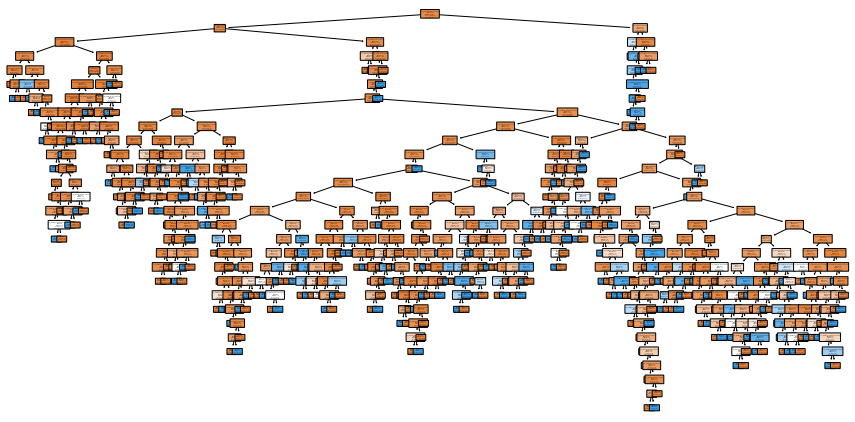

In [40]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=["No Target","Yes Target"],feature_names=x_n.columns);

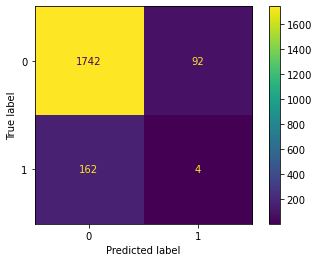

In [41]:
#Plot confusion Matrix
#it will run the test data down the tree and draw a confusion matrix
plot_confusion_matrix(clf_dt,x_test,y_test,display_labels=["0","1"])

In [42]:
#Pruning the Dataset
path=clf_dt.cost_complexity_pruning_path(x_train,y_train)# Determining the value for alpha
ccp_alphas=path.ccp_alphas#extract different values for alphas
ccp_alphas=ccp_alphas[:-1]#excude maximum value for alphas
clf_dts= [] #creating an array that will put the decison tree into
# We are now creating one decision tree per value per alpha and store it in the array 
for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train,y_train)
    clf_dts.append(clf_dt)

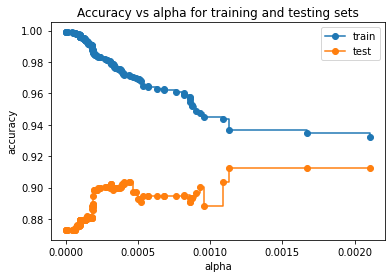

In [43]:
train_scores = [clf_dt.score(x_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

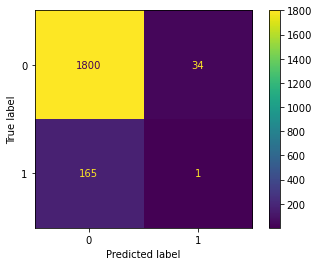

Accuracy of classification tree after pruning: (10000    0
10001    0
10002    0
10003    0
10004    0
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: TARGET, Length: 2000, dtype: int64, array([0, 0, 0, ..., 0, 0, 0], dtype=int64))


In [44]:
clfopt = DecisionTreeClassifier(random_state = 0, ccp_alpha=.00027)
clfopt.fit(x_train,y_train)
plot_confusion_matrix(clfopt, x_test, y_test)
plt.show()

y_pred=clfopt.predict(x_test)
print("Accuracy of classification tree after pruning:",(y_test, y_pred))

<AxesSubplot:xlabel='tree'>

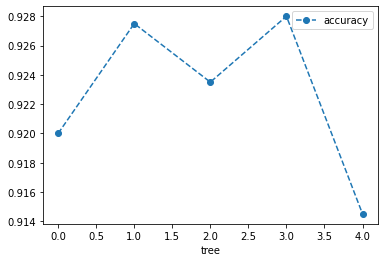

In [45]:
clf_dt= DecisionTreeClassifier(random_state=0,ccp_alpha=0.002)#Create the tree with alpha of 0.002
##Now usee 5 fold cross-validation and create 5 different training and testing sets
##that are then used to verify the test and train the tree
scores=cross_val_score(clf_dt,x_train,y_train,cv=5)
bureausubset=pd.DataFrame(data={'tree':range(5),'accuracy':scores})
bureausubset.plot(x='tree',y='accuracy', marker="o",linestyle='--')

<AxesSubplot:xlabel='alpha'>

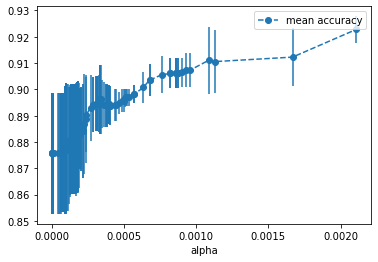

In [46]:
#Create an array to store the results of each fold during a cross validation
alpha_loop_values=[]
## For each candidate alpha , will run 5 fold cross validations
##Then will store the mean and std of the scores(accuracy)for each call

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,x_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
        
#Now we will draw a graph of the means and std of the scores
alpha_results=pd.DataFrame(alpha_loop_values, columns=['alpha','mean accuracy','std'])
        
alpha_results.plot(x='alpha',y='mean accuracy',yerr='std',marker='o' ,linestyle='--')
    


In [47]:
alpha_results[(alpha_results['alpha']>0.0017)& (alpha_results['alpha']<0.0022)]

,alpha,mean accuracy,std
144,0.002108,0.9227,0.005026


In [48]:
#Now lets store the ideal value for alpha so that we can use it to build a tree
ideal_ccp_alpha =alpha_results[(alpha_results['alpha']>0.0017)& (alpha_results['alpha']<0.0022)]['alpha']
ideal_ccp_alpha

144    0.002108
Name: alpha, dtype: float64

In [49]:
#Now we are converting ideal_ccp_alpha from a series to a float
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.0021081131768712533

In [50]:
#Now we are going to build and Train a new decision tree and we will use optimal value for alpha
clf_dt_pruned=DecisionTreeClassifier(random_state=0,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned=clf_dt_pruned.fit(x_train,y_train)

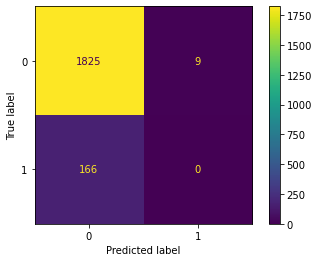

In [51]:
plot_confusion_matrix(clf_dt_pruned,x_test, y_test,display_labels=["0","1"])

In [52]:
xnew.dtypes

Unnamed: 0                  int64
SK_ID_CURR                  int64
NAME_CONTRACT_TYPE         object
CODE_GENDER                object
FLAG_OWN_CAR               object
                           ...   
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY_y             float64
Length: 138, dtype: object

In [53]:
ynew

0          1
1          1
2          1
3          1
4          1
          ..
1465320    0
1465321    0
1465322    0
1465323    0
1465324    0
Name: TARGET, Length: 1465325, dtype: int64

In [54]:
#Create the object of the class
woe_gender=WOEEncoder()
woe_flagcar=WOEEncoder()
woe_flagrealty=WOEEncoder()
woe_weekdaystart=WOEEncoder()
woe_organization=WOEEncoder()
woe_familystatus=WOEEncoder()
woe_namehousingtype=WOEEncoder()
woe_education=WOEEncoder()
woe_contract=WOEEncoder()
woe_incometype=WOEEncoder()
woe_fond=WOEEncoder()
woe_wallsmaterial=WOEEncoder()
woe_housetype=WOEEncoder()
woe_flagcar=WOEEncoder()
woe_emergencystate=WOEEncoder()
woe_occupation=WOEEncoder()
woe_nametypesuite=WOEEncoder()
woe_credittype=WOEEncoder()



In [56]:
#Creating extra column in the dataframe
xnew['gender']=woe_gender.fit_transform(xnew['CODE_GENDER'],ynew)
xnew['flagcar']=woe_flagcar.fit_transform(xnew['FLAG_OWN_CAR'],ynew)
xnew['flagrealty']=woe_flagrealty.fit_transform(xnew['FLAG_OWN_REALTY'],ynew)
xnew['weekdaystart']=woe_weekdaystart.fit_transform(xnew['WEEKDAY_APPR_PROCESS_START'],ynew)
xnew['organization']=woe_organization.fit_transform(xnew['ORGANIZATION_TYPE'],ynew)
xnew['familystatus']=woe_familystatus.fit_transform(xnew['NAME_FAMILY_STATUS'],ynew)
xnew['namehousingtype']=woe_namehousingtype.fit_transform(xnew['NAME_HOUSING_TYPE'],ynew)
xnew['education']=woe_education.fit_transform(xnew['NAME_EDUCATION_TYPE'],ynew)
xnew['contract']=woe_contract.fit_transform(xnew['NAME_CONTRACT_TYPE'],ynew)
xnew['incometype']=woe_incometype.fit_transform(xnew['NAME_INCOME_TYPE'],ynew)
xnew['fond']=woe_fond.fit_transform(xnew['FONDKAPREMONT_MODE'],ynew)
xnew['wallsmaterial']=woe_wallsmaterial.fit_transform(xnew['WALLSMATERIAL_MODE'],ynew)
xnew['housetype']=woe_housetype.fit_transform(xnew['HOUSETYPE_MODE'],ynew)
xnew['emergencystate']=woe_emergencystate.fit_transform(xnew['EMERGENCYSTATE_MODE'],ynew)
xnew['occupationtype']=woe_occupation.fit_transform(xnew['OCCUPATION_TYPE'],ynew)
xnew['nametypesuite']=woe_nametypesuite.fit_transform(xnew['NAME_TYPE_SUITE'],ynew)
xnew['credittype']=woe_credittype.fit_transform(xnew['CREDIT_TYPE'],ynew)
xnew.head()






,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,education,contract,incometype,fond,wallsmaterial,housetype,emergencystate,occupationtype,nametypesuite,credittype
0,0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.110057,0.035219,0.155934,-0.129544,-0.06666,-0.138235,-0.129277,0.265373,0.01278,0.129524
1,0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.110057,0.035219,0.155934,-0.129544,-0.06666,-0.138235,-0.129277,0.265373,0.01278,0.129524
2,0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.110057,0.035219,0.155934,-0.129544,-0.06666,-0.138235,-0.129277,0.265373,0.01278,-0.046961
3,0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.110057,0.035219,0.155934,-0.129544,-0.06666,-0.138235,-0.129277,0.265373,0.01278,-0.046961
4,0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.110057,0.035219,0.155934,-0.129544,-0.06666,-0.138235,-0.129277,0.265373,0.01278,-0.046961


In [57]:
#drop the categorical columns used
x_n2=xnew.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_EDUCATION_TYPE','NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','FONDKAPREMONT_MODE','WALLSMATERIAL_MODE','HOUSETYPE_MODE','EMERGENCYSTATE_MODE','OCCUPATION_TYPE','NAME_TYPE_SUITE','CREDIT_TYPE'], axis='columns')
x_n2

,Unnamed: 0,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,education,contract,incometype,fond,wallsmaterial,housetype,emergencystate,occupationtype,nametypesuite,credittype
0,0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.110057,0.035219,0.155934,-0.129544,-0.066660,-0.138235,-0.129277,0.265373,0.01278,0.129524
1,0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.110057,0.035219,0.155934,-0.129544,-0.066660,-0.138235,-0.129277,0.265373,0.01278,0.129524
2,0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.110057,0.035219,0.155934,-0.129544,-0.066660,-0.138235,-0.129277,0.265373,0.01278,-0.046961
3,0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.110057,0.035219,0.155934,-0.129544,-0.066660,-0.138235,-0.129277,0.265373,0.01278,-0.046961
4,0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0.110057,0.035219,0.155934,-0.129544,-0.066660,-0.138235,-0.129277,0.265373,0.01278,-0.046961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465320,307510,456255,0,157500.0,675000.0,49117.5,675000.0,0.046220,-16856,-1262,...,-0.361028,0.035219,-0.052026,0.066008,-0.216414,-0.138235,-0.129277,0.265373,0.01278,-0.046961
1465321,307510,456255,0,157500.0,675000.0,49117.5,675000.0,0.046220,-16856,-1262,...,-0.361028,0.035219,-0.052026,0.066008,-0.216414,-0.138235,-0.129277,0.265373,0.01278,-0.046961
1465322,307510,456255,0,157500.0,675000.0,49117.5,675000.0,0.046220,-16856,-1262,...,-0.361028,0.035219,-0.052026,0.066008,-0.216414,-0.138235,-0.129277,0.265373,0.01278,-0.046961
1465323,307510,456255,0,157500.0,675000.0,49117.5,675000.0,0.046220,-16856,-1262,...,-0.361028,0.035219,-0.052026,0.066008,-0.216414,-0.138235,-0.129277,0.265373,0.01278,0.129524


In [58]:
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
x_n2,ynew=make_classification(
   n_samples=15000,
   n_features=10,
   n_informative=3,
   n_redundant=0,
   n_repeated=0,
   n_classes=2,
   random_state=0,
   shuffle=False,
)
#split the data into training and tets sets
x_train2,x_test2,y_train2,y_test2=train_test_split(x_n2,ynew,test_size=2000,train_size=10000,random_state=0)

In [166]:
model.score(x_test2,y_test2)

0.9365

In [61]:
y_predicted=model.predict(x_test2)

In [62]:
from sklearn import metrics
print("Accuracy=" ,metrics.accuracy_score(y_test2, y_predicted))

Accuracy= 0.9365


In [66]:
model.score(x_test2,y_test2)

0.9365

In [67]:
y_predicted =model.predict(x_test2)

In [68]:
from sklearn import metrics 
print("Accuracy=",metrics.accuracy_score(y_test2,y_predicted))

Accuracy= 0.9365
